In [1551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Data Loading

In [1553]:
# Read the weather data from the CSV file and store it in a DataFrame
Weather_DataFrame = pd.read_csv('Weather Data.csv')

# Display the DataFrame containing the weather data
Weather_DataFrame

YEAR  MONTH  DAY  Temperature at 2 Meters  Dew/Frost Point at 2 Meters  \
0     2013      1    1                     9.62                        -1.28   
1     2013      1    2                     9.11                        -2.54   
2     2013      1    3                     9.37                        -5.02   
3     2013      1    4                     8.65                        -4.79   
4     2013      1    5                     7.65                        -5.74   
...    ...    ...  ...                      ...                          ...   
4012  2023     12   27                    14.60                         4.86   
4013  2023     12   28                    13.03                         4.43   
4014  2023     12   29                    13.35                         4.33   
4015  2023     12   30                    12.95                         3.88   
4016  2023     12   31                    12.85                         2.81   

      Temperature at 2 Meters Maximum  Temperature at 2 Meters Minimum  \
0                               15.24                             5.64   
1                               19.15                             1.80   
2                               18.68                             3.35   
3                               19.11                             1.76   
4                               17.94                             0.51   
...                               ...                              ...   
4012                            21.62                             9.49   
4013                            21.74                             7.23   
4014                            20.53                             7.79   
4015                            19.33                             8.33   
4016                            19.62                             8.33   

      Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                     3.54                              47.00   
1                                     3.17                              48.56   
2                                     2.62                              38.06   
3                                     2.69                              40.75   
4                                     2.50                              41.69   
...                                    ...                                ...   
4012                                  5.43                              53.31   
4013                                  5.25                              58.12   
4014                                  5.25                              56.56   
4015                                  5.07                              55.50   
4016                                  4.70                              52.00   

      Precipitation Corrected (mm/day)  Wind Speed at 10 Meters  
0                                  0.0                     1.54  
1                                  0.0                     3.04  
2                                  0.0                     2.23  
3                                  0.0                     3.38  
4                                  0.0                     3.39  
...                                ...                      ...  
4012                               0.0                     1.45  
4013                               0.0                     2.27  
4014                               0.0                     1.25  
4015                               0.0                     1.09  
4016                               0.0                     0.64  

[4017 rows x 11 columns]

# Data Understanding

In [1555]:
# Print a concise summary of the DataFrame, including data types and non-null values
print(Weather_DataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   YEAR                                  4017 non-null   int64  
 1   MONTH                                 4017 non-null   int64  
 2   DAY                                   4017 non-null   int64  
 3   Temperature at 2 Meters               4017 non-null   float64
 4   Dew/Frost Point at 2 Meters           4017 non-null   float64
 5   Temperature at 2 Meters Maximum       4017 non-null   float64
 6   Temperature at 2 Meters Minimum       4017 non-null   float64
 7   Specific Humidity at 2 Meters (g/kg)  4017 non-null   float64
 8   Relative Humidity at 2 Meters (%)     4017 non-null   float64
 9   Precipitation Corrected (mm/day)      4017 non-null   float64
 10  Wind Speed at 10 Meters               4017 non-null   float64
dtypes: float64(8), in

In [1557]:
# Display summary statistics for numerical columns in the DataFrame (e.g., mean, standard deviation, etc.)
display(Weather_DataFrame.describe())

YEAR        MONTH         DAY  Temperature at 2 Meters  \
count  4017.000000  4017.000000  4017.00000              4017.000000   
mean   2018.000000     6.523774    15.72716                25.185651   
std       3.162199     3.448901     8.80014                 8.432407   
min    2013.000000     1.000000     1.00000                 6.530000   
25%    2015.000000     4.000000     8.00000                17.570000   
50%    2018.000000     7.000000    16.00000                26.730000   
75%    2021.000000    10.000000    23.00000                32.260000   
max    2023.000000    12.000000    31.00000                41.400000   

       Dew/Frost Point at 2 Meters  Temperature at 2 Meters Maximum  \
count                  4017.000000                      4017.000000   
mean                     10.895367                        32.359828   
std                       8.837996                         7.876286   
min                     -13.310000                         9.580000   
25%                       4.190000                        25.860000   
50%                      10.250000                        33.300000   
75%                      18.720000                        38.550000   
max                      27.190000                        49.070000   

       Temperature at 2 Meters Minimum  Specific Humidity at 2 Meters (g/kg)  \
count                      4017.000000                           4017.000000   
mean                         18.918357                              9.663874   
std                           8.404811                              5.487096   
min                          -0.270000                              1.280000   
25%                          11.370000                              5.250000   
50%                          20.040000                              8.000000   
75%                          26.550000                             13.850000   
max                          35.260000                             23.250000   

       Relative Humidity at 2 Meters (%)  Precipitation Corrected (mm/day)  \
count                        4017.000000                       4017.000000   
mean                           46.652161                          2.047827   
std                            17.508872                          6.589541   
min                             9.190000                          0.000000   
25%                            33.190000                          0.000000   
50%                            45.810000                          0.000000   
75%                            59.120000                          0.810000   
max                            96.750000                        136.580000   

       Wind Speed at 10 Meters  
count              4017.000000  
mean                  2.371068  
std                   0.812146  
min                   0.570000  
25%                   1.770000  
50%                   2.260000  
75%                   2.870000  
max                   7.020000

# Data Cleaning

In [1559]:
# Print the total number of missing (null) values in each column of the DataFrame
print(Weather_DataFrame.isnull().sum())

YEAR                                    0
MONTH                                   0
DAY                                     0
Temperature at 2 Meters                 0
Dew/Frost Point at 2 Meters             0
Temperature at 2 Meters Maximum         0
Temperature at 2 Meters Minimum         0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Precipitation Corrected (mm/day)        0
Wind Speed at 10 Meters                 0
dtype: int64


There are no missing values in the data set.

In [1561]:
# Remove duplicate rows from the DataFrame
Weather_DataFrame.drop_duplicates(inplace = True)

# Display the DataFrame after removing duplicates
Weather_DataFrame

YEAR  MONTH  DAY  Temperature at 2 Meters  Dew/Frost Point at 2 Meters  \
0     2013      1    1                     9.62                        -1.28   
1     2013      1    2                     9.11                        -2.54   
2     2013      1    3                     9.37                        -5.02   
3     2013      1    4                     8.65                        -4.79   
4     2013      1    5                     7.65                        -5.74   
...    ...    ...  ...                      ...                          ...   
4012  2023     12   27                    14.60                         4.86   
4013  2023     12   28                    13.03                         4.43   
4014  2023     12   29                    13.35                         4.33   
4015  2023     12   30                    12.95                         3.88   
4016  2023     12   31                    12.85                         2.81   

      Temperature at 2 Meters Maximum  Temperature at 2 Meters Minimum  \
0                               15.24                             5.64   
1                               19.15                             1.80   
2                               18.68                             3.35   
3                               19.11                             1.76   
4                               17.94                             0.51   
...                               ...                              ...   
4012                            21.62                             9.49   
4013                            21.74                             7.23   
4014                            20.53                             7.79   
4015                            19.33                             8.33   
4016                            19.62                             8.33   

      Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                     3.54                              47.00   
1                                     3.17                              48.56   
2                                     2.62                              38.06   
3                                     2.69                              40.75   
4                                     2.50                              41.69   
...                                    ...                                ...   
4012                                  5.43                              53.31   
4013                                  5.25                              58.12   
4014                                  5.25                              56.56   
4015                                  5.07                              55.50   
4016                                  4.70                              52.00   

      Precipitation Corrected (mm/day)  Wind Speed at 10 Meters  
0                                  0.0                     1.54  
1                                  0.0                     3.04  
2                                  0.0                     2.23  
3                                  0.0                     3.38  
4                                  0.0                     3.39  
...                                ...                      ...  
4012                               0.0                     1.45  
4013                               0.0                     2.27  
4014                               0.0                     1.25  
4015                               0.0                     1.09  
4016                               0.0                     0.64  

[4017 rows x 11 columns]

There are no duplicate values in the data set.

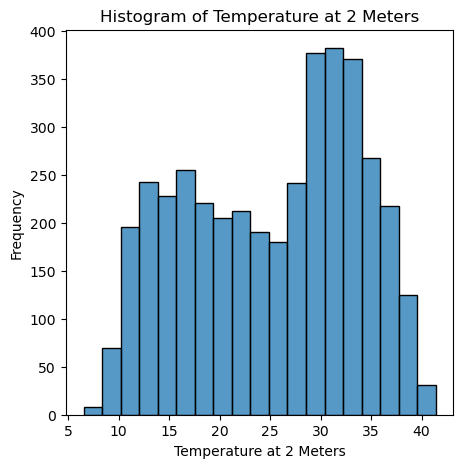

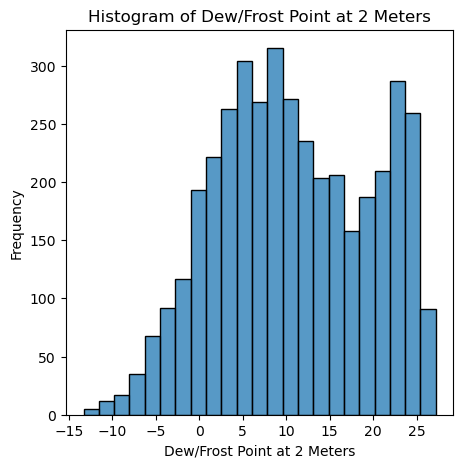

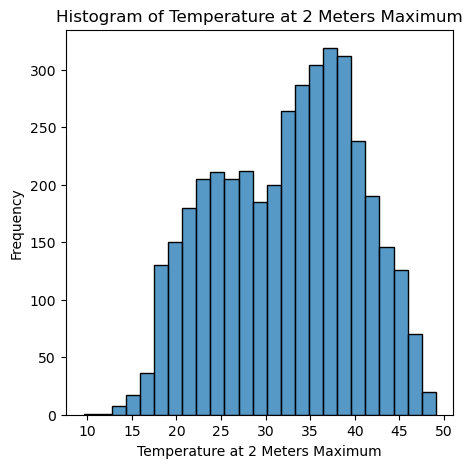

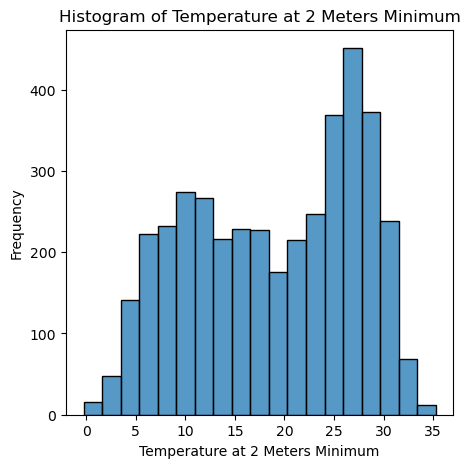

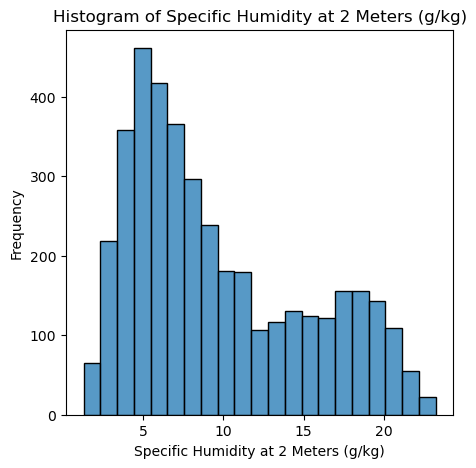

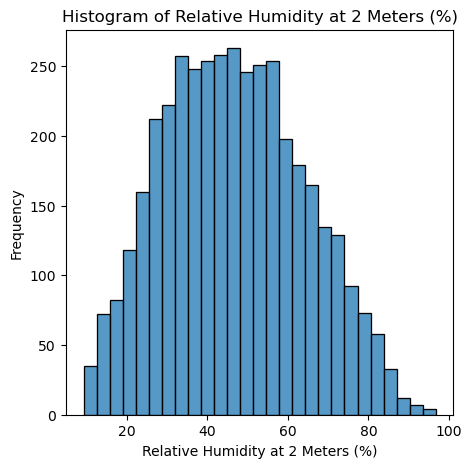

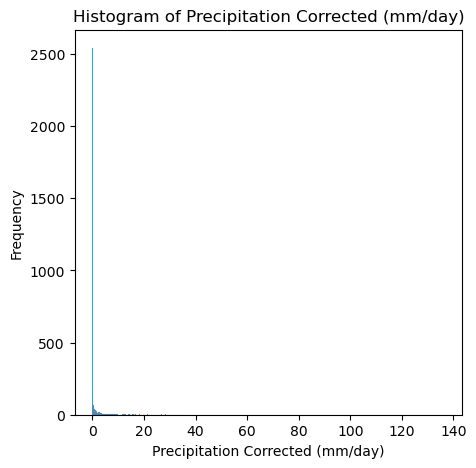

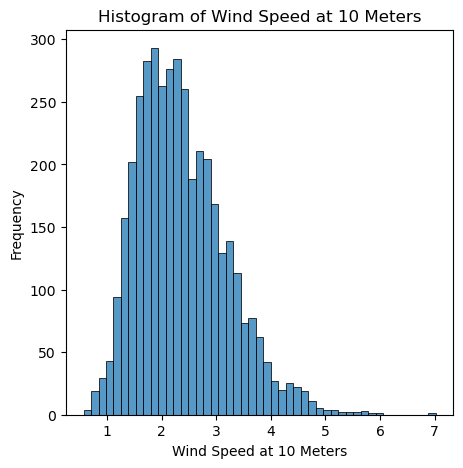

In [1563]:
# Function to plot the distribution for all columns
def plot_histograms(df):
    cols = df.columns
    
    for col in cols:
        plt.figure(figsize=(5, 5))
        
        sns.histplot(df[col])
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

# Plot distributions and check for skewness/normality
plot_histograms(Weather_DataFrame.iloc[:,3:])

It appears that the data is not normalized and shows skewed distributions in the histograms.

In [1564]:
# We will use the Interquartile Range (IQR) method to check for outliers in the dataset.
# Because the IQR method effectively identifies outliers without being influenced by extreme values.
# This method is particularly useful when the data distribution is skewed.

# Function to identify and print outliers using the IQR method
def iqr_outliers(df):
    cols = df.columns
    
    for col in cols:
        Q1 = df[col].quantile(0.25)  # 1st Quartile
        Q3 = df[col].quantile(0.75)  # 3rd Quartile
        IQR = Q3 - Q1                # Interquartile Range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        # Print outliers if any, otherwise state none found
        if not outliers.empty:
            print(f"Outliers in {col}:")
            print(outliers)
        else:
            print(f"No outliers found in {col}.")
        print()  # For better readability

iqr_outliers(Weather_DataFrame.iloc[:,3:])

No outliers found in Temperature at 2 Meters.

No outliers found in Dew/Frost Point at 2 Meters.

No outliers found in Temperature at 2 Meters Maximum.

No outliers found in Temperature at 2 Meters Minimum.

No outliers found in Specific Humidity at 2 Meters (g/kg).

No outliers found in Relative Humidity at 2 Meters (%).

Outliers in Precipitation Corrected (mm/day):
17       7.90
33       6.59
34       9.68
35      14.04
46      13.46
        ...  
3938    28.39
3940    17.47
3941     8.78
3965    18.63
3985     2.76
Name: Precipitation Corrected (mm/day), Length: 742, dtype: float64

Outliers in Wind Speed at 10 Meters:
34      4.66
35      4.81
59      4.81
127     4.55
141     4.68
144     5.13
161     4.76
434     5.35
521     4.53
785     4.73
875     4.72
890     4.57
1176    4.70
1179    5.62
1197    4.55
1198    4.65
1205    5.23
1233    4.69
1303    4.64
1495    5.62
1555    4.91
1559    4.62
1560    4.67
1561    4.55
1562    4.55
1573    4.58
1616    4.91
1868    4.74
1913 

We are not removing the outliers. Outliers in the Precipitation Corrected (mm/day) and Wind Speed at 10 Meters data contains valuable information about extreme weather events and conditions that are significant for analysis. Removing these outliers could lead to a loss of critical insights regarding rare but impactful occurrences, such as heavy rainfall or high wind speeds. These extreme values might represent genuine observations rather than errors, especially in meteorological data where variability is expected.

# Data Transformation

In [1565]:
# Data Normalization

# Step 1: Robust Scaling (to handle outliers)
scaler = RobustScaler()
Weather_DataFrame.iloc[:, 3:] = pd.DataFrame(scaler.fit_transform(Weather_DataFrame.iloc[:, 3:]), columns=Weather_DataFrame.iloc[:, 3:].columns)

# Step 2: Z-Score Scaling (Standardization)
standard_scaler = StandardScaler()
Weather_DataFrame.iloc[:, 3:] = pd.DataFrame(standard_scaler.fit_transform(Weather_DataFrame.iloc[:, 3:]), columns=Weather_DataFrame.iloc[:, 3:].columns)

Weather_DataFrame

YEAR  MONTH  DAY  Temperature at 2 Meters  Dew/Frost Point at 2 Meters  \
0     2013      1    1                -1.846162                    -1.377788   
1     2013      1    2                -1.906650                    -1.520372   
2     2013      1    3                -1.875813                    -1.801013   
3     2013      1    4                -1.961209                    -1.774986   
4     2013      1    5                -2.079814                    -1.882490   
...    ...    ...  ...                      ...                          ...   
4012  2023     12   27                -1.255510                    -0.682974   
4013  2023     12   28                -1.441719                    -0.731633   
4014  2023     12   29                -1.403766                    -0.742949   
4015  2023     12   30                -1.451208                    -0.793872   
4016  2023     12   31                -1.463068                    -0.914956   

      Temperature at 2 Meters Maximum  Temperature at 2 Meters Minimum  \
0                           -2.173862                        -1.580049   
1                           -1.677373                        -2.036987   
2                           -1.737054                        -1.852546   
3                           -1.682453                        -2.041747   
4                           -1.831018                        -2.190489   
...                               ...                              ...   
4012                        -1.363735                        -1.121921   
4013                        -1.348497                        -1.390848   
4014                        -1.502142                        -1.324211   
4015                        -1.654517                        -1.259954   
4016                        -1.617693                        -1.259954   

      Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                -1.116189                           0.019869   
1                                -1.183628                           0.108978   
2                                -1.283876                          -0.490793   
3                                -1.271117                          -0.337137   
4                                -1.305748                          -0.283444   
...                                    ...                                ...   
4012                             -0.771702                           0.380303   
4013                             -0.804510                           0.655055   
4014                             -0.804510                           0.565946   
4015                             -0.837318                           0.505398   
4016                             -0.904757                           0.305474   

      Precipitation Corrected (mm/day)  Wind Speed at 10 Meters  
0                            -0.310808                -1.023426  
1                            -0.310808                 0.823762  
2                            -0.310808                -0.173719  
3                            -0.310808                 1.242458  
4                            -0.310808                 1.254773  
...                                ...                      ...  
4012                         -0.310808                -1.134257  
4013                         -0.310808                -0.124461  
4014                         -0.310808                -1.380549  
4015                         -0.310808                -1.577583  
4016                         -0.310808                -2.131739  

[4017 rows x 11 columns]

The first step involves Robust Scaling to handle outliers effectively. RobustScaler uses the median and the interquartile range (IQR) to scale the features, which makes it less sensitive to extreme values. This is particularly important in our dataset, as we have identified outliers in the Precipitation Corrected and Wind Speed columns. By applying Robust Scaling, we ensure that the data retains its distribution while minimizing the influence of these outliers on the scaling process.

Standardization is a method used to change the values in our data so that they have a mean (average) of 0 and a standard deviation of 1. This helps ensure that each feature contributes equally to the analysis, making it easier to compare different features.

We chose to ignore Min-Max scaling because it can be affected by skewed data. Min-Max scaling stretches the data to fit within a specific range (usually 0 to 1), which can distort the values when there are extreme values or outliers. Since our data has skewness, using Min-Max scaling might make the features misleading and less effective for analysis. Instead, standardization is a better choice because it focuses on the overall distribution of the data without being influenced by the extreme values.

In [1569]:
# Data Type Conversion

Weather_DataFrame['YEAR'] = Weather_DataFrame['YEAR'].astype(str)

In [1571]:
# Data Recoding

# Mapping month numbers to month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert month numbers in the DataFrame to their corresponding month names
Weather_DataFrame.insert(2, 'MONTH Name', Weather_DataFrame['MONTH'].map(month_map))

# Function to assign seasons based on month names
def assign_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
# Insert a new column 'SEASON' in the DataFrame based on the month names
Weather_DataFrame.insert(1, 'SEASON', Weather_DataFrame['MONTH Name'].apply(assign_season))

# Display the updated DataFrame with month names and corresponding seasons
Weather_DataFrame

YEAR  SEASON  MONTH MONTH Name  DAY  Temperature at 2 Meters  \
0     2013  Winter      1    January    1                -1.846162   
1     2013  Winter      1    January    2                -1.906650   
2     2013  Winter      1    January    3                -1.875813   
3     2013  Winter      1    January    4                -1.961209   
4     2013  Winter      1    January    5                -2.079814   
...    ...     ...    ...        ...  ...                      ...   
4012  2023  Winter     12   December   27                -1.255510   
4013  2023  Winter     12   December   28                -1.441719   
4014  2023  Winter     12   December   29                -1.403766   
4015  2023  Winter     12   December   30                -1.451208   
4016  2023  Winter     12   December   31                -1.463068   

      Dew/Frost Point at 2 Meters  Temperature at 2 Meters Maximum  \
0                       -1.377788                        -2.173862   
1                       -1.520372                        -1.677373   
2                       -1.801013                        -1.737054   
3                       -1.774986                        -1.682453   
4                       -1.882490                        -1.831018   
...                           ...                              ...   
4012                    -0.682974                        -1.363735   
4013                    -0.731633                        -1.348497   
4014                    -0.742949                        -1.502142   
4015                    -0.793872                        -1.654517   
4016                    -0.914956                        -1.617693   

      Temperature at 2 Meters Minimum  Specific Humidity at 2 Meters (g/kg)  \
0                           -1.580049                             -1.116189   
1                           -2.036987                             -1.183628   
2                           -1.852546                             -1.283876   
3                           -2.041747                             -1.271117   
4                           -2.190489                             -1.305748   
...                               ...                                   ...   
4012                        -1.121921                             -0.771702   
4013                        -1.390848                             -0.804510   
4014                        -1.324211                             -0.804510   
4015                        -1.259954                             -0.837318   
4016                        -1.259954                             -0.904757   

      Relative Humidity at 2 Meters (%)  Precipitation Corrected (mm/day)  \
0                              0.019869                         -0.310808   
1                              0.108978                         -0.310808   
2                             -0.490793                         -0.310808   
3                             -0.337137                         -0.310808   
4                             -0.283444                         -0.310808   
...                                 ...                               ...   
4012                           0.380303                         -0.310808   
4013                           0.655055                         -0.310808   
4014                           0.565946                         -0.310808   
4015                           0.505398                         -0.310808   
4016                           0.305474                         -0.310808   

      Wind Speed at 10 Meters  
0                   -1.023426  
1                    0.823762  
2                   -0.173719  
3                    1.242458  
4                    1.254773  
...                       ...  
4012                -1.134257  
4013                -0.124461  
4014                -1.380549  
4015                -1.577583  
4016                -2.131739  

[4017 rows x 13 columns]

We are converting numerical month values (1-12) into their corresponding month names (e.g., 1 becomes "January"). This transformation enhances readability and makes the data more interpretable.

By creating a new column that categorizes months into seasons (Winter, Spring, Summer, Fall), we can explore trends and patterns in our data based on seasonal changes. This can be particularly relevant in meteorological datasets where weather conditions vary significantly between seasons.

In [1573]:
# Data Encoding

label_encoder = LabelEncoder()

# Apply label encoding to 'YEAR' and 'SEASON' columns
Weather_DataFrame.insert(1, 'YEAR_Encoded', label_encoder.fit_transform(Weather_DataFrame['YEAR']))
Weather_DataFrame.insert(3, 'SEASON_Encoded', label_encoder.fit_transform(Weather_DataFrame['SEASON']))

Weather_DataFrame

YEAR  YEAR_Encoded  SEASON  SEASON_Encoded  MONTH MONTH Name  DAY  \
0     2013             0  Winter               3      1    January    1   
1     2013             0  Winter               3      1    January    2   
2     2013             0  Winter               3      1    January    3   
3     2013             0  Winter               3      1    January    4   
4     2013             0  Winter               3      1    January    5   
...    ...           ...     ...             ...    ...        ...  ...   
4012  2023            10  Winter               3     12   December   27   
4013  2023            10  Winter               3     12   December   28   
4014  2023            10  Winter               3     12   December   29   
4015  2023            10  Winter               3     12   December   30   
4016  2023            10  Winter               3     12   December   31   

      Temperature at 2 Meters  Dew/Frost Point at 2 Meters  \
0                   -1.846162                    -1.377788   
1                   -1.906650                    -1.520372   
2                   -1.875813                    -1.801013   
3                   -1.961209                    -1.774986   
4                   -2.079814                    -1.882490   
...                       ...                          ...   
4012                -1.255510                    -0.682974   
4013                -1.441719                    -0.731633   
4014                -1.403766                    -0.742949   
4015                -1.451208                    -0.793872   
4016                -1.463068                    -0.914956   

      Temperature at 2 Meters Maximum  Temperature at 2 Meters Minimum  \
0                           -2.173862                        -1.580049   
1                           -1.677373                        -2.036987   
2                           -1.737054                        -1.852546   
3                           -1.682453                        -2.041747   
4                           -1.831018                        -2.190489   
...                               ...                              ...   
4012                        -1.363735                        -1.121921   
4013                        -1.348497                        -1.390848   
4014                        -1.502142                        -1.324211   
4015                        -1.654517                        -1.259954   
4016                        -1.617693                        -1.259954   

      Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                -1.116189                           0.019869   
1                                -1.183628                           0.108978   
2                                -1.283876                          -0.490793   
3                                -1.271117                          -0.337137   
4                                -1.305748                          -0.283444   
...                                    ...                                ...   
4012                             -0.771702                           0.380303   
4013                             -0.804510                           0.655055   
4014                             -0.804510                           0.565946   
4015                             -0.837318                           0.505398   
4016                             -0.904757                           0.305474   

      Precipitation Corrected (mm/day)  Wind Speed at 10 Meters  
0                            -0.310808                -1.023426  
1                            -0.310808                 0.823762  
2                            -0.310808                -0.173719  
3                            -0.310808                 1.242458  
4                            -0.310808                 1.254773  
...                                ...                      ...  
4012                         -0.3108

# Exploratory Data Analysis

## Univariate Analysis

#### Observe the frequency distribution of continuous variables.

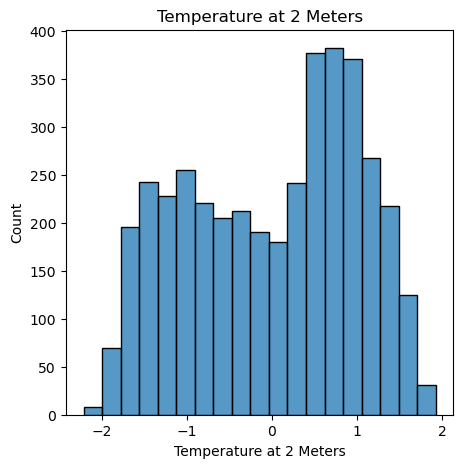

In [1135]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Temperature at 2 Meters", data = Weather_DataFrame)
plt.title('Temperature at 2 Meters')
plt.show()

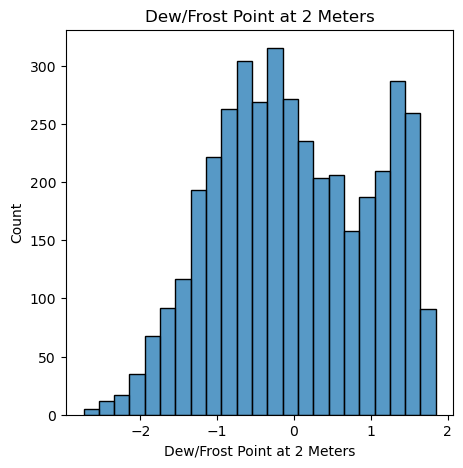

In [1137]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Dew/Frost Point at 2 Meters", data = Weather_DataFrame)
plt.title('Dew/Frost Point at 2 Meters')
plt.show()

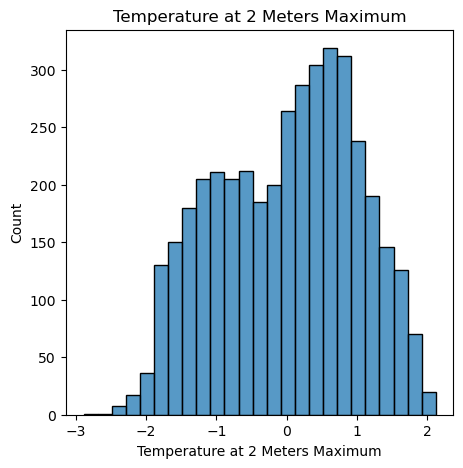

In [1139]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Temperature at 2 Meters Maximum", data = Weather_DataFrame)
plt.title('Temperature at 2 Meters Maximum')
plt.show()

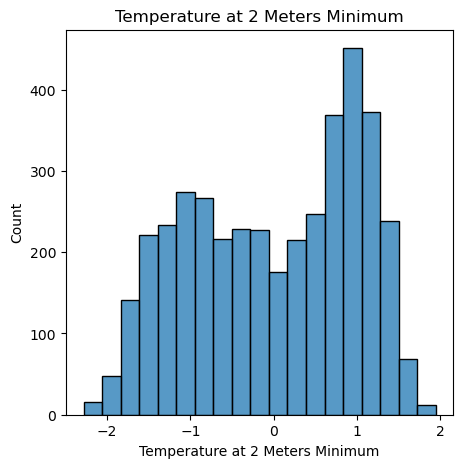

In [1141]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Temperature at 2 Meters Minimum", data = Weather_DataFrame)
plt.title('Temperature at 2 Meters Minimum')
plt.show()

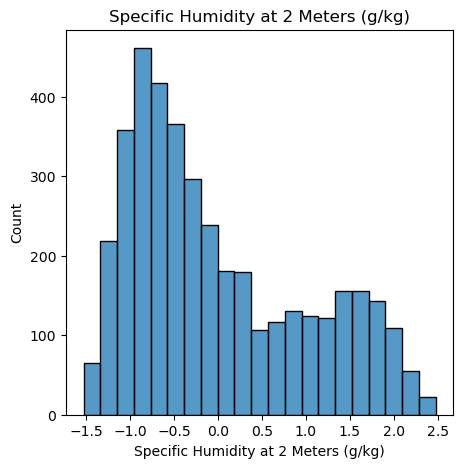

In [1143]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Specific Humidity at 2 Meters (g/kg)", data = Weather_DataFrame)
plt.title('Specific Humidity at 2 Meters (g/kg)')
plt.show()

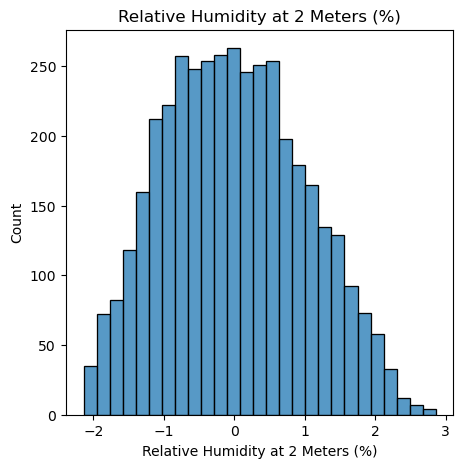

In [1145]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Relative Humidity at 2 Meters (%)", data = Weather_DataFrame)
plt.title('Relative Humidity at 2 Meters (%)')
plt.show()

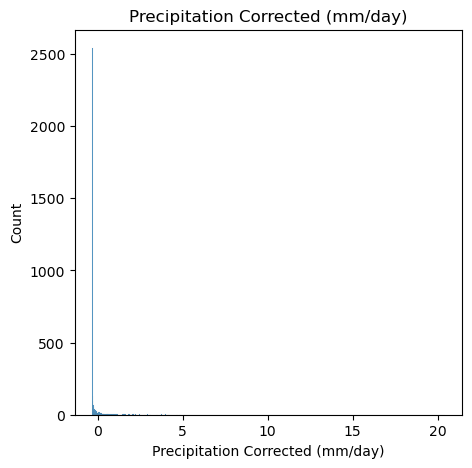

In [1147]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Precipitation Corrected (mm/day)", data = Weather_DataFrame)
plt.title('Precipitation Corrected (mm/day)')
plt.show()

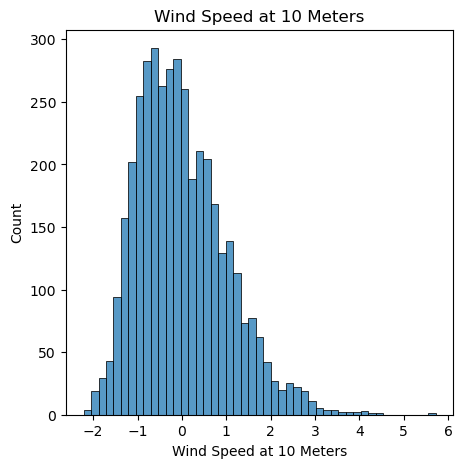

In [1149]:
plt.figure(figsize=(5, 5))
sns.histplot(x = "Wind Speed at 10 Meters", data = Weather_DataFrame)
plt.title('Wind Speed at 10 Meters')
plt.show()

#### Detect the presence of outliers and gauge the spread of the data, including the interquartile range (IQR), which provides insight into the data's central tendency (e.g., mean, median) and variability.

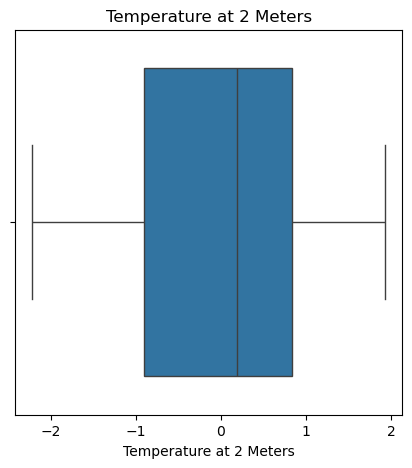

In [1151]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Temperature at 2 Meters", data = Weather_DataFrame)
plt.title('Temperature at 2 Meters')
plt.show()

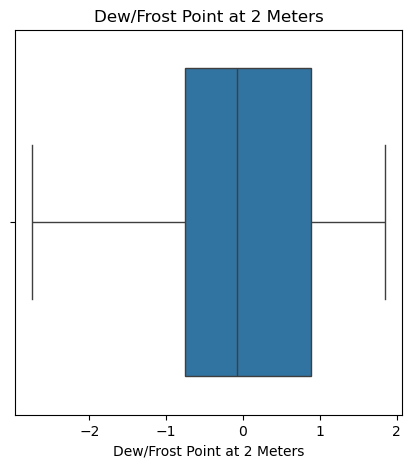

In [1153]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Dew/Frost Point at 2 Meters", data = Weather_DataFrame)
plt.title('Dew/Frost Point at 2 Meters')
plt.show()

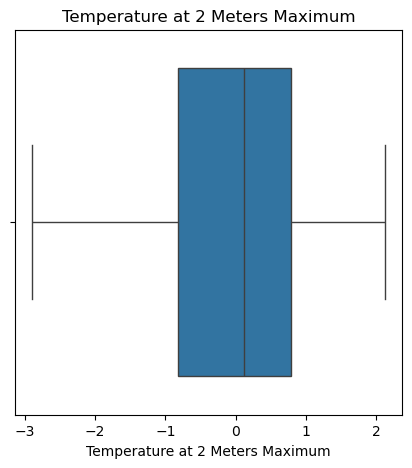

In [1155]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Temperature at 2 Meters Maximum", data = Weather_DataFrame)
plt.title('Temperature at 2 Meters Maximum')
plt.show()

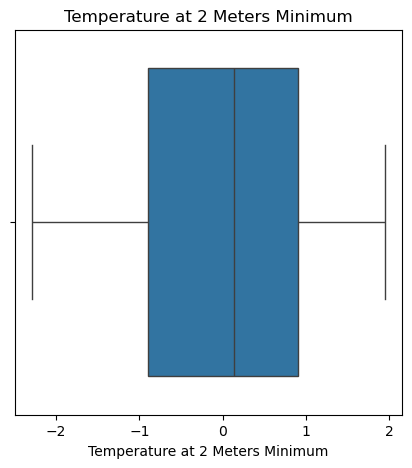

In [1157]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Temperature at 2 Meters Minimum", data = Weather_DataFrame)
plt.title('Temperature at 2 Meters Minimum')
plt.show()

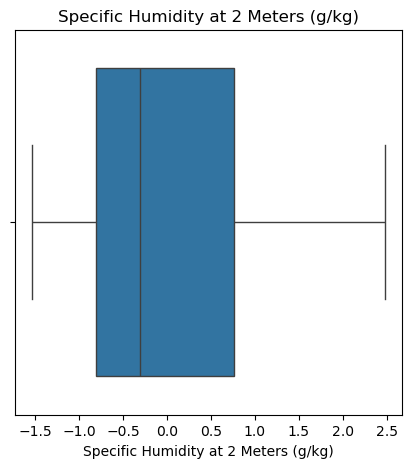

In [1159]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Specific Humidity at 2 Meters (g/kg)", data = Weather_DataFrame)
plt.title('Specific Humidity at 2 Meters (g/kg)')
plt.show()

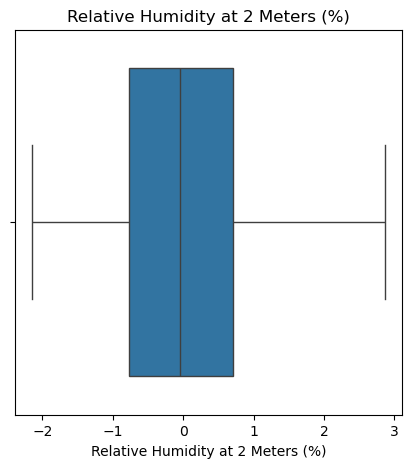

In [1161]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Relative Humidity at 2 Meters (%)", data = Weather_DataFrame)
plt.title('Relative Humidity at 2 Meters (%)')
plt.show()

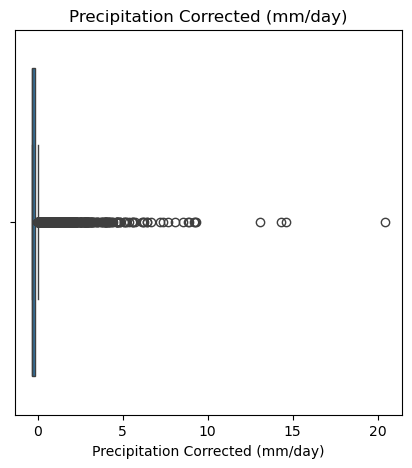

In [1163]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Precipitation Corrected (mm/day)", data = Weather_DataFrame)
plt.title('Precipitation Corrected (mm/day)')
plt.show()

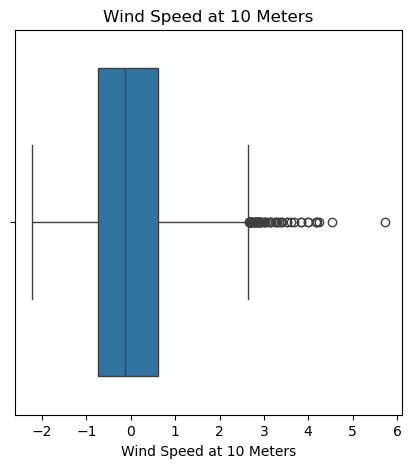

In [1165]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "Wind Speed at 10 Meters", data = Weather_DataFrame)
plt.title('Wind Speed at 10 Meters')
plt.show()

## Bivariate Analysis

#### Visualize how two continuous variables relate to each other.

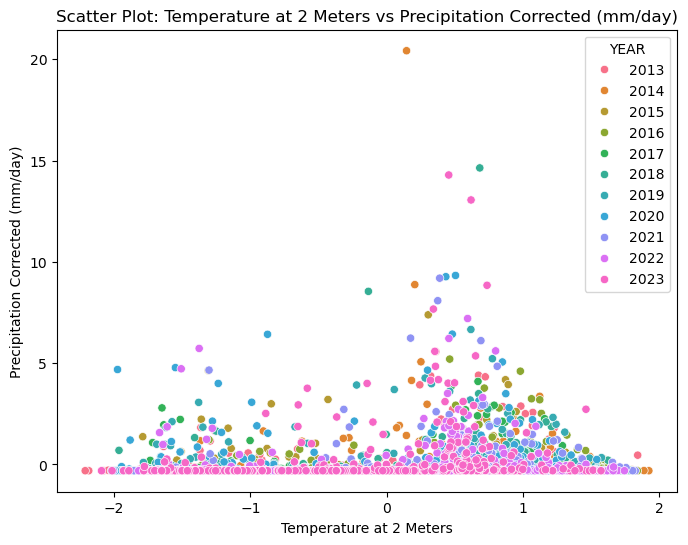

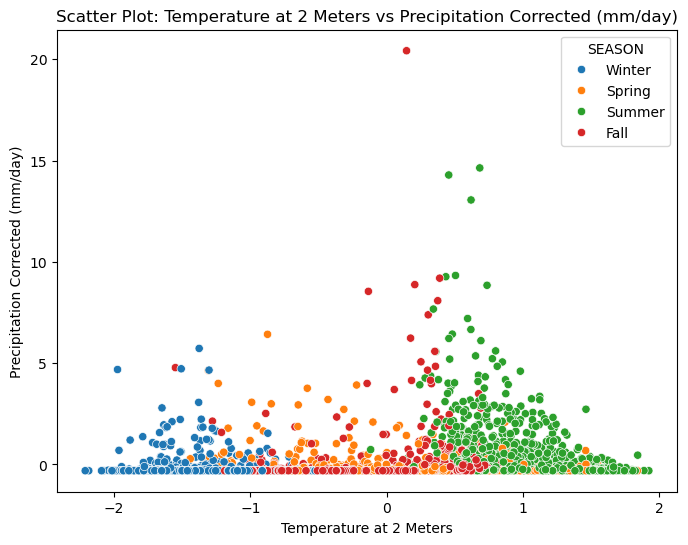

In [1167]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature at 2 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Temperature at 2 Meters vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature at 2 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Temperature at 2 Meters vs Precipitation Corrected (mm/day)")
plt.show()

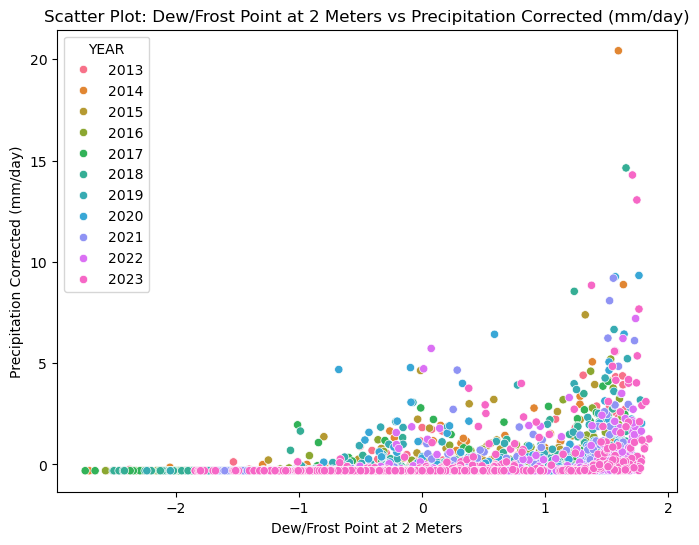

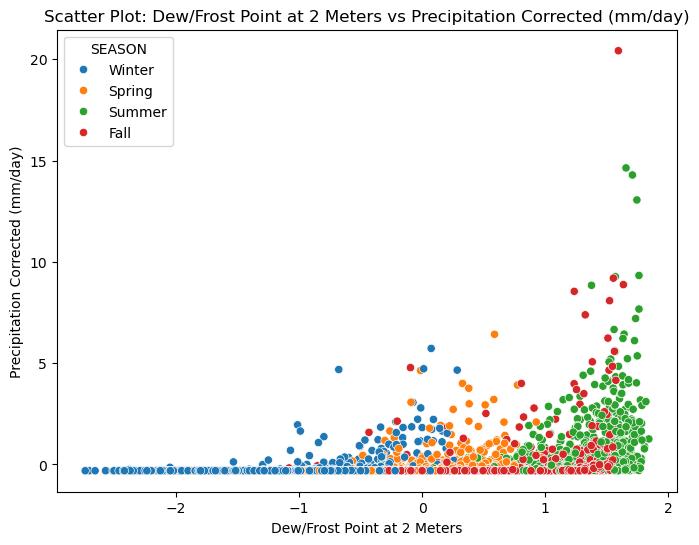

In [1169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Dew/Frost Point at 2 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Dew/Frost Point at 2 Meters vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Dew/Frost Point at 2 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Dew/Frost Point at 2 Meters vs Precipitation Corrected (mm/day)")
plt.show()

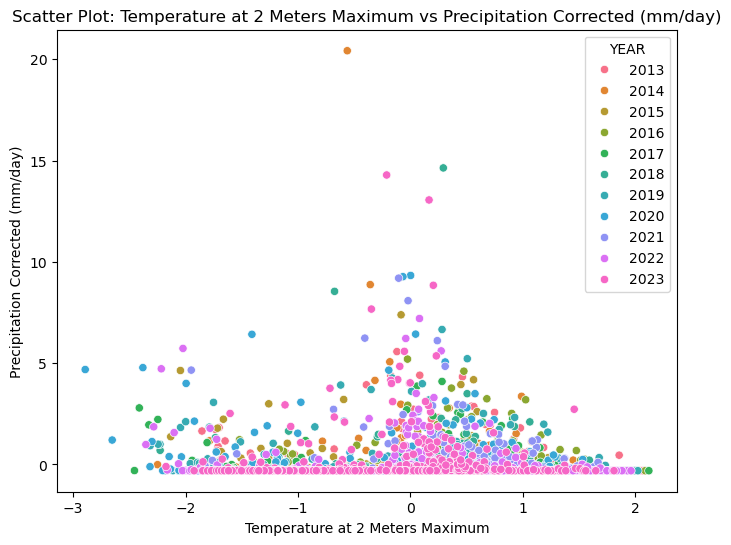

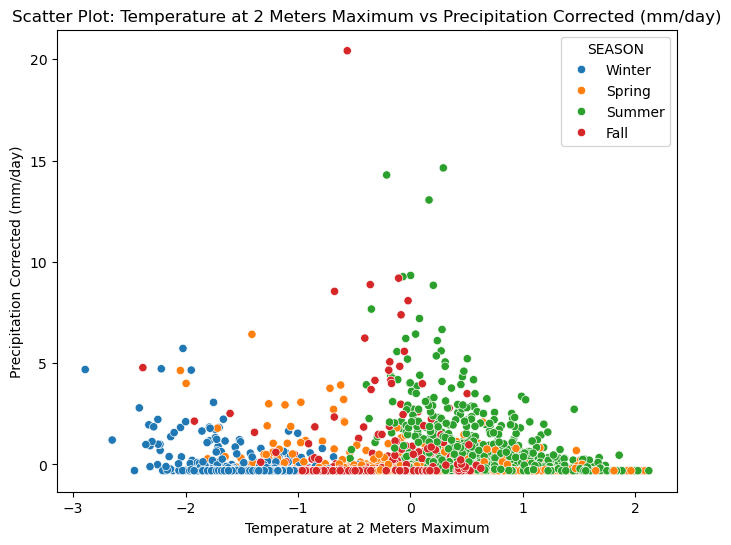

In [1171]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature at 2 Meters Maximum", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Temperature at 2 Meters Maximum vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature at 2 Meters Maximum", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Temperature at 2 Meters Maximum vs Precipitation Corrected (mm/day)")
plt.show()

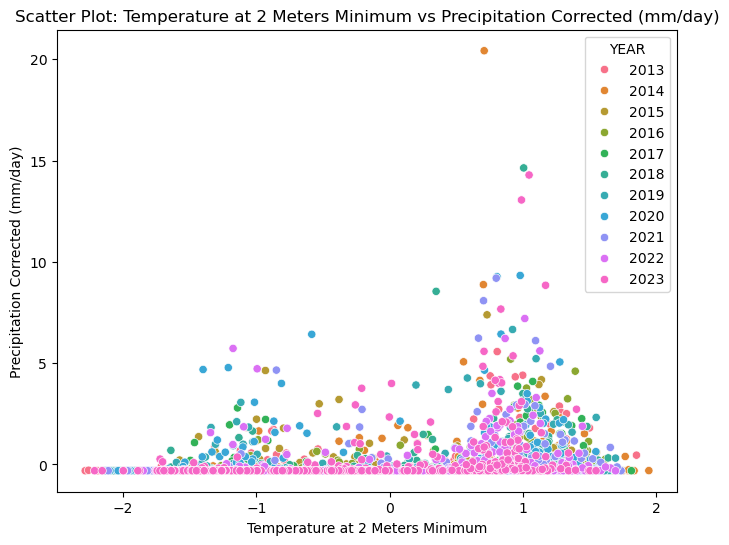

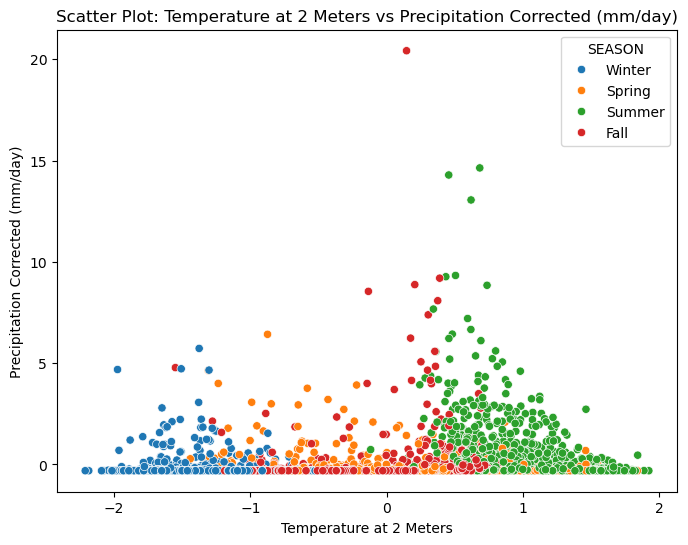

In [1173]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature at 2 Meters Minimum", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Temperature at 2 Meters Minimum vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Temperature at 2 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Temperature at 2 Meters vs Precipitation Corrected (mm/day)")
plt.show()

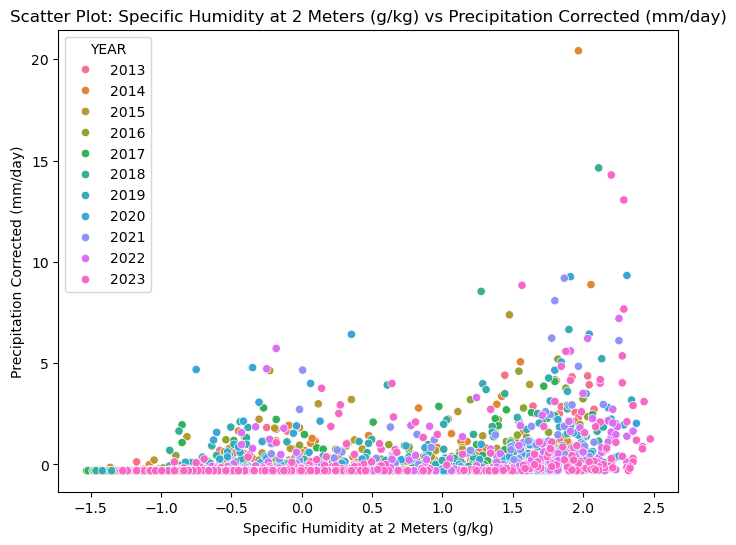

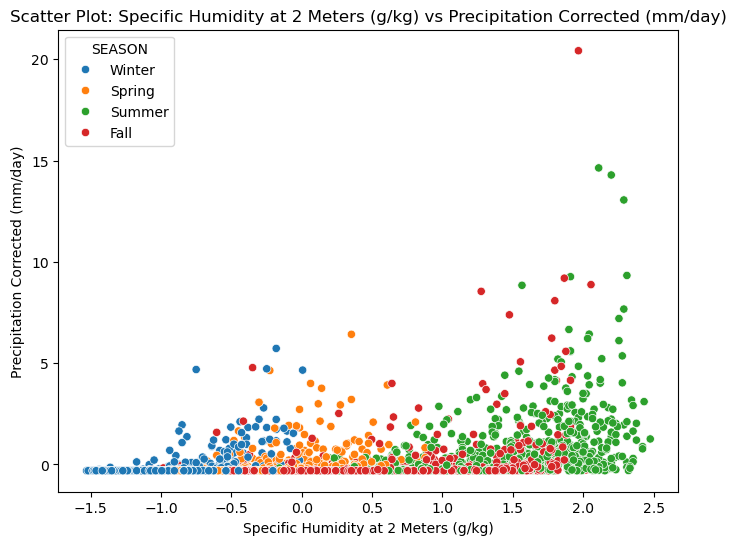

In [1175]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Specific Humidity at 2 Meters (g/kg)", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Specific Humidity at 2 Meters (g/kg) vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Specific Humidity at 2 Meters (g/kg)", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Specific Humidity at 2 Meters (g/kg) vs Precipitation Corrected (mm/day)")
plt.show()

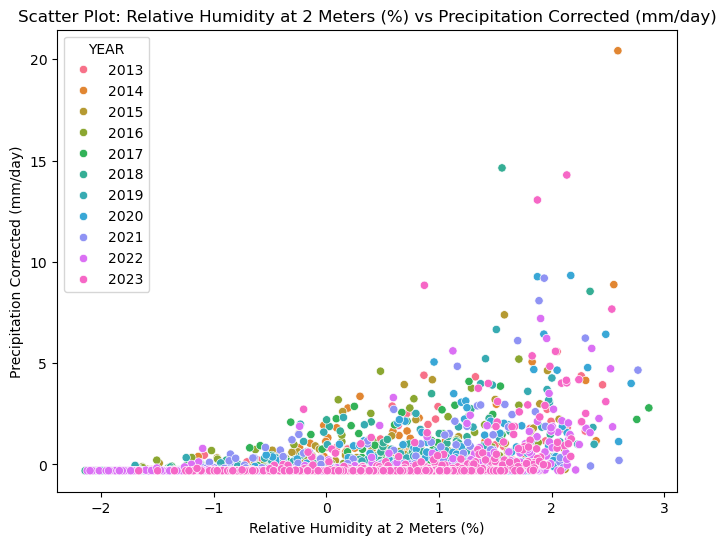

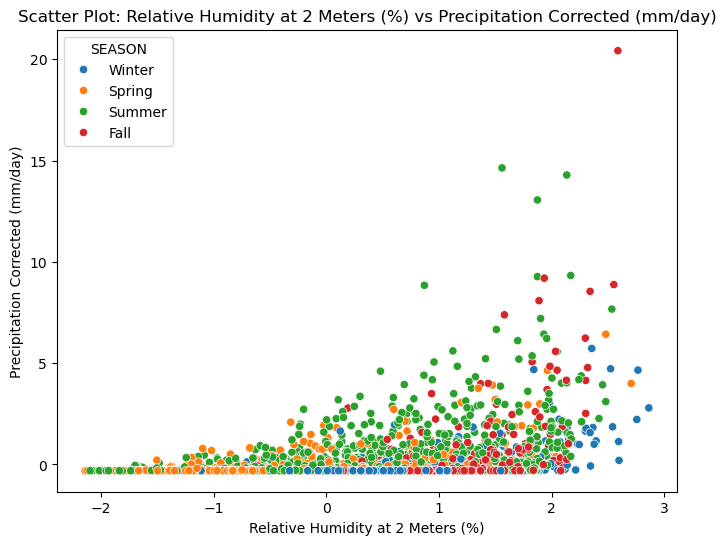

In [1177]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Relative Humidity at 2 Meters (%)", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Relative Humidity at 2 Meters (%) vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Relative Humidity at 2 Meters (%)", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Relative Humidity at 2 Meters (%) vs Precipitation Corrected (mm/day)")
plt.show()

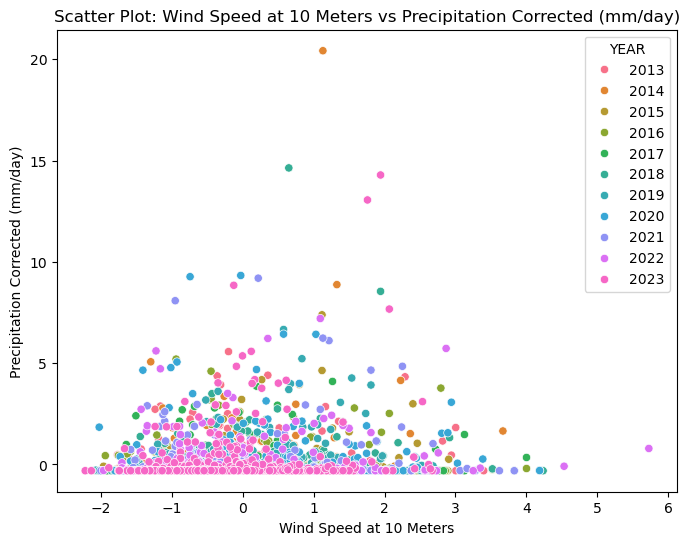

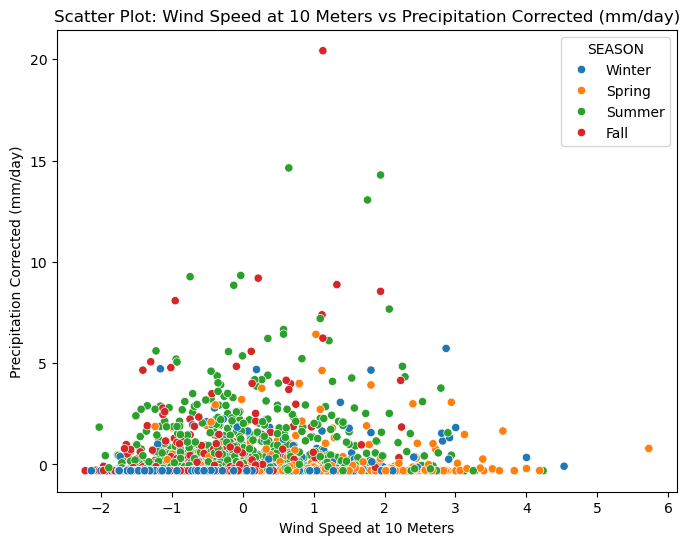

In [1179]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Wind Speed at 10 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "YEAR")
plt.title("Scatter Plot: Wind Speed at 10 Meters vs Precipitation Corrected (mm/day)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Wind Speed at 10 Meters", y="Precipitation Corrected (mm/day)", data=Weather_DataFrame, hue = "SEASON")
plt.title("Scatter Plot: Wind Speed at 10 Meters vs Precipitation Corrected (mm/day)")
plt.show()

## Multivariate Analysis

#### Quantify the strength of relationships between numerical variables, identifying which variables have strong positive or negative correlations.

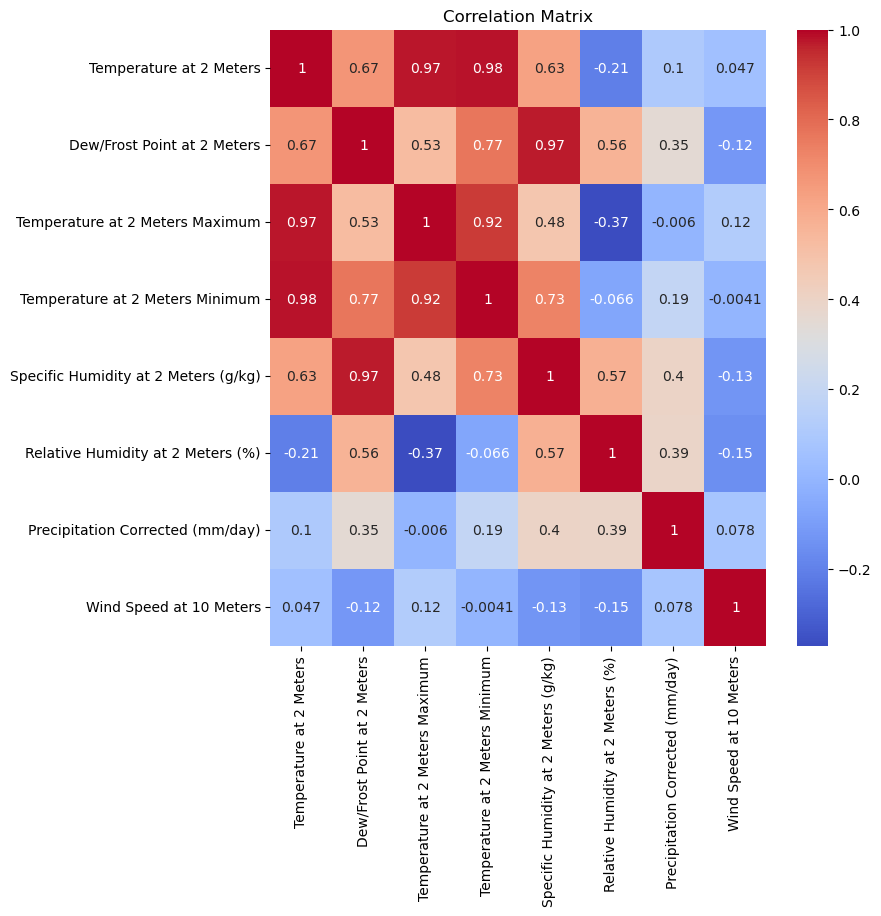

In [1181]:
plt.figure(figsize=(8, 8))
corr_matrix = Weather_DataFrame.iloc[:, 7:].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1200x800 with 0 Axes>

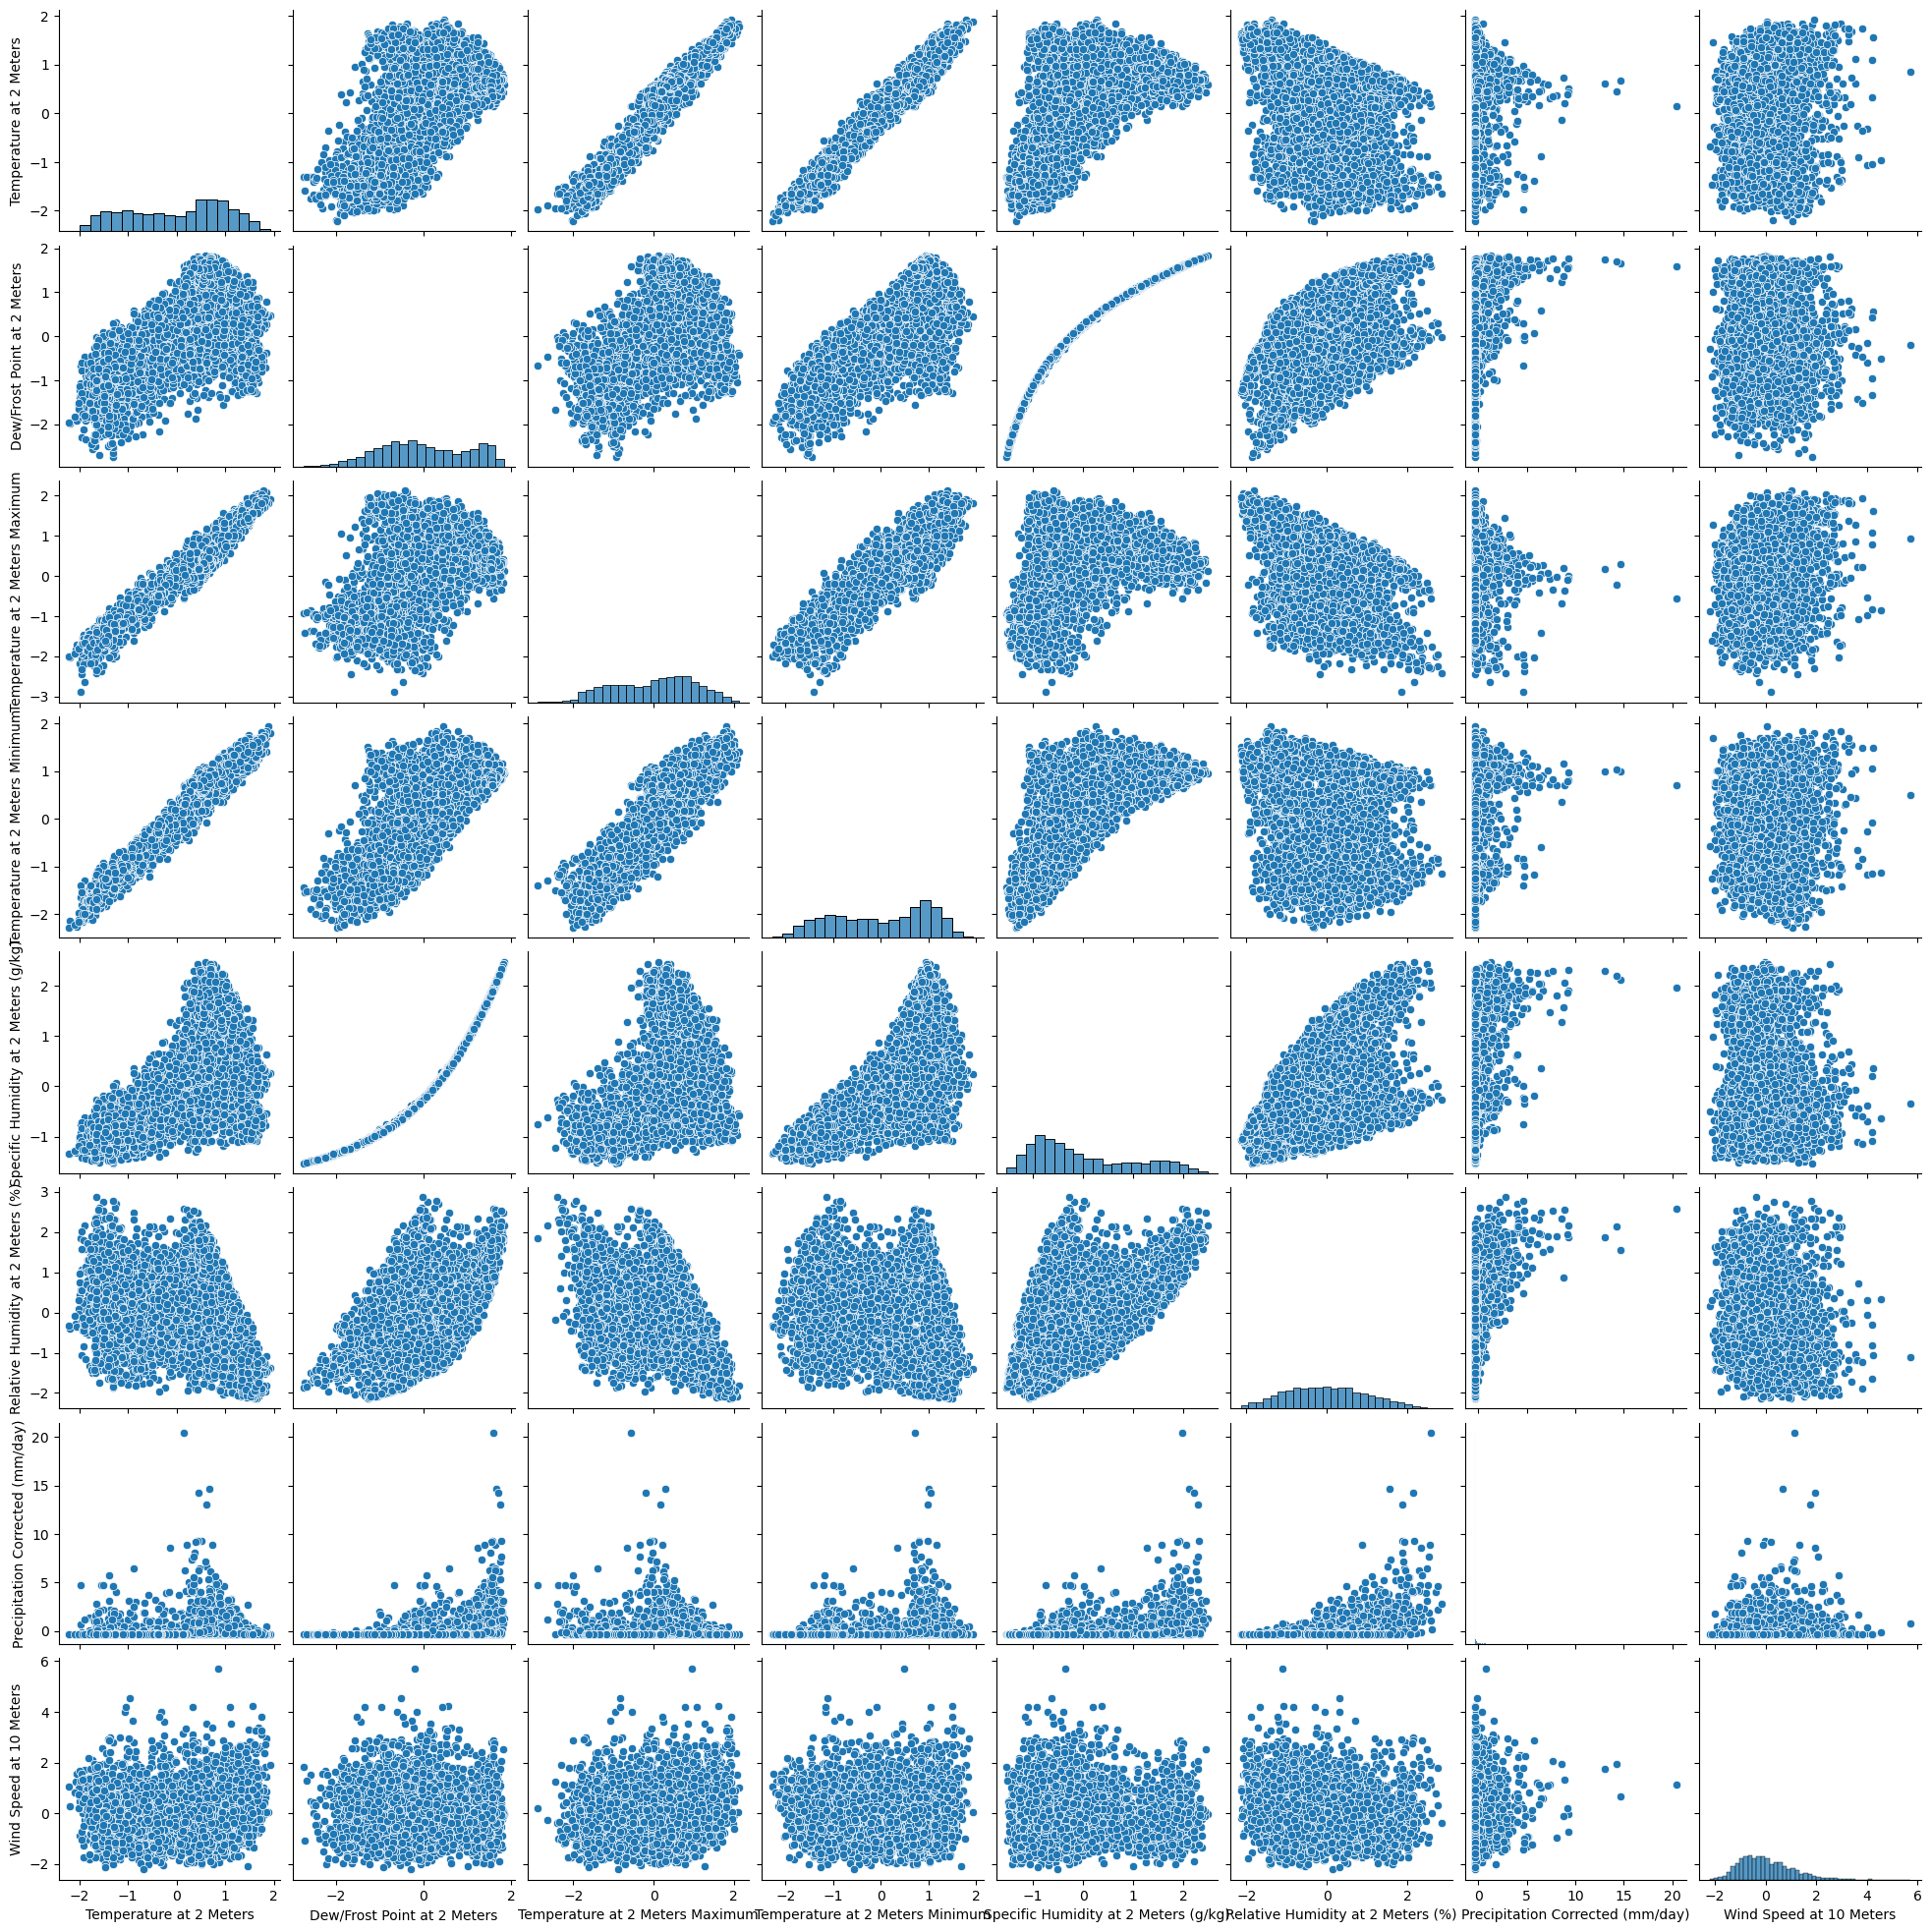

In [1183]:
plt.figure(figsize=(12, 8))
sns.pairplot(Weather_DataFrame.iloc[:, 7:])
plt.show()

## Feature Analysis

#### Identify and assess the importance of features in relation to the target variable.

In [1184]:
# Correlation with Target Variable ("Precipitation Corrected (mm/day)")

precipitation_corr = Weather_DataFrame.iloc[:, 7:].corr()["Precipitation Corrected (mm/day)"].sort_values(ascending=False)
print("\nCorrelation of Features with 'Precipitation Corrected (mm/day)':")
print(precipitation_corr)


Correlation of Features with 'Precipitation Corrected (mm/day)':
Precipitation Corrected (mm/day)        1.000000
Specific Humidity at 2 Meters (g/kg)    0.395596
Relative Humidity at 2 Meters (%)       0.390047
Dew/Frost Point at 2 Meters             0.347871
Temperature at 2 Meters Minimum         0.189018
Temperature at 2 Meters                 0.102116
Wind Speed at 10 Meters                 0.078357
Temperature at 2 Meters Maximum        -0.006020
Name: Precipitation Corrected (mm/day), dtype: float64



Average 'Precipitation Corrected (mm/day)' by Month:
YEAR
2013   -0.033489
2014   -0.031784
2015   -0.069358
2016   -0.078153
2017   -0.068925
2018   -0.051856
2019   -0.012773
2020    0.100426
2021    0.021815
2022    0.034702
2023    0.189333
Name: Precipitation Corrected (mm/day), dtype: float64


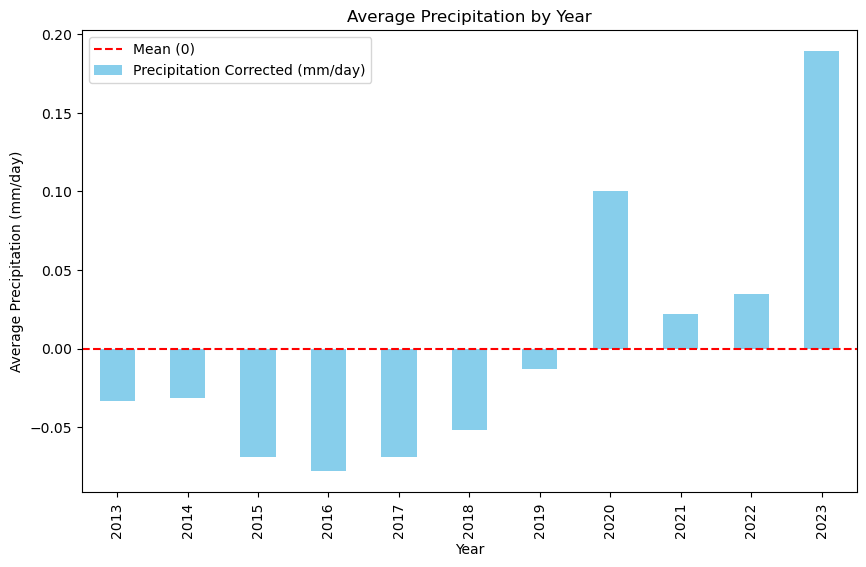

In [1185]:
# Average Precipitation by Year

yearly_precipitation = Weather_DataFrame.groupby("YEAR")["Precipitation Corrected (mm/day)"].mean()
print("\nAverage 'Precipitation Corrected (mm/day)' by Month:")
print(yearly_precipitation)

# Plotting the average precipitation by year
plt.figure(figsize=(10, 6))
yearly_precipitation.plot(kind='bar', color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', label='Mean (0)')
plt.title("Average Precipitation by Year")
plt.xlabel("Year")
plt.ylabel("Average Precipitation (mm/day)")
plt.legend()
plt.show()


Average 'Precipitation Corrected (mm/day)' by Season:
SEASON
Fall     -0.069215
Spring   -0.162027
Summer    0.419662
Winter   -0.192987
Name: Precipitation Corrected (mm/day), dtype: float64


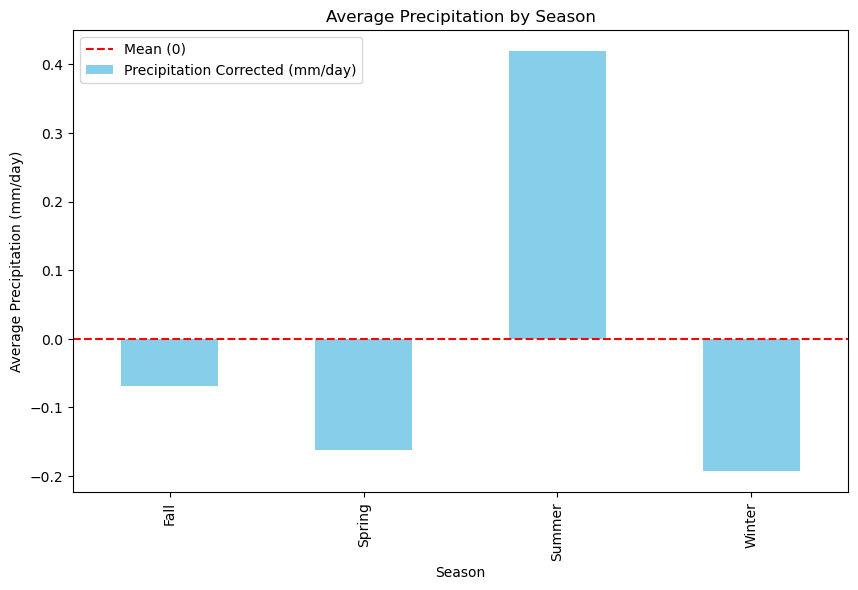

In [1186]:
# Average Precipitation by Season

seasonly_precipitation = Weather_DataFrame.groupby("SEASON")["Precipitation Corrected (mm/day)"].mean()
print("\nAverage 'Precipitation Corrected (mm/day)' by Season:")
print(seasonly_precipitation)

# Plotting the average precipitation by season
plt.figure(figsize=(10, 6))
seasonly_precipitation.plot(kind='bar', color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', label='Mean (0)')
plt.title("Average Precipitation by Season")
plt.xlabel("Season")
plt.ylabel("Average Precipitation (mm/day)")
plt.legend()
plt.show()


Average 'Precipitation Corrected (mm/day)' by Month:
MONTH Name
April       -0.190538
August       0.402693
December    -0.279211
February    -0.168399
January     -0.129115
July         0.732573
June         0.113857
March       -0.103050
May         -0.193412
November    -0.242974
October     -0.194943
September    0.234463
Name: Precipitation Corrected (mm/day), dtype: float64


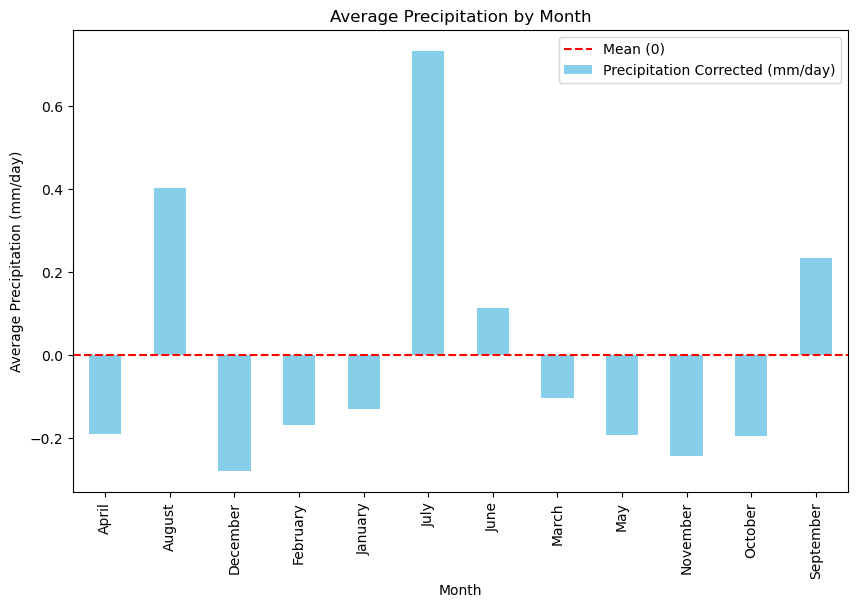

In [1187]:
# Average Precipitation by Month

monthly_precipitation = Weather_DataFrame.groupby("MONTH Name")["Precipitation Corrected (mm/day)"].mean()
print("\nAverage 'Precipitation Corrected (mm/day)' by Month:")
print(monthly_precipitation)

# Plotting the average precipitation by month
plt.figure(figsize=(10, 6))
monthly_precipitation.plot(kind='bar', color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', label='Mean (0)')
plt.title("Average Precipitation by Month")
plt.xlabel("Month")
plt.ylabel("Average Precipitation (mm/day)")
plt.legend()
plt.show()

In [1349]:
# Model Training

# Select features (X) and target variable (y)
X = Weather_DataFrame.drop(columns=['YEAR', 'SEASON', 'MONTH Name', 'Precipitation Corrected (mm/day)'])  # Replace 'TARGET_COLUMN' with your actual target column name
y = Weather_DataFrame['Precipitation Corrected (mm/day)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1539]:
# Machine Learning Model

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=5)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 0.8009177217742272
Random Forest Root Mean Squared Error: 0.894940066023545
Random Forest R-squared: 0.543055546422809


The MSE is 0.800, which suggests the predictions are fairly close to the actual values on average.
The RMSE of 0.89 indicates the model's predictions deviate from the actual values by about 0.89 units on average.
R^2 = 0.543 means that the model explains 49.8% of the variance in the target variable. While this shows the model captures some patterns in the data, there is still room for improvement.

In [1541]:
# Create a DataFrame with X_test, actual, and predicted values
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred_rf

# Print the DataFrame
results_df

YEAR_Encoded  SEASON_Encoded  MONTH  DAY  Temperature at 2 Meters  \
1228             3               1      5   13                 1.327704   
2471             6               0     10    8                 0.088283   
1675             4               2      8    3                 1.000355   
1026             2               0     10   24                -0.095554   
3259             8               3     12    4                -0.930532   
...            ...             ...    ...  ...                      ...   
2293             6               1      4   13                 0.439354   
3125             8               2      7   23                 0.909029   
3414             9               1      5    8                 1.294495   
708              1               3     12   10                -1.434603   
1898             5               1      3   14                -0.078949   

      Dew/Frost Point at 2 Meters  Temperature at 2 Meters Maximum  \
1228                    -0.144323                         1.467901   
2471                     0.407907                         0.107954   
1675                     1.338098                         0.890146   
1026                    -0.414780                         0.020338   
3259                    -0.506441                        -0.873595   
...                           ...                              ...   
2293                     0.396591                         0.436830   
3125                     1.322255                         0.681900   
3414                    -0.308408                         1.525042   
708                     -1.623349                        -1.098348   
1898                    -1.155990                         0.280646   

      Temperature at 2 Meters Minimum  Specific Humidity at 2 Meters (g/kg)  \
1228                         1.116362                             -0.359775   
2471                        -0.078341                              0.152399   
1675                         1.088993                              1.508477   
1026                         0.201296                             -0.571206   
3259                        -0.932720                             -0.649582   
...                               ...                                   ...   
2293                         0.513061                              0.141463   
3125                         1.094943                              1.475668   
3414                         1.028306                             -0.492831   
708                         -1.539591                             -1.216437   
1898                        -0.309190                             -1.005005   

      Relative Humidity at 2 Meters (%)  Wind Speed at 10 Meters    Actual  \
1228                          -1.454424                -0.777134 -0.309290   
2471                           0.323182                -0.924909 -0.310808   
1675                           0.487690                 0.873021 -0.257687   
1026                          -0.640450                 0.109516 -0.303219   
3259                           0.219792                -0.629359 -0.310808   
...                                 ...                      ...       ...   
2293                          -0.201761                 0.454325 -0.259205   
3125                           0.551666                -0.555472 -0.310808   
3414                          -1.536679                -1.121943 -0.310808   
708                           -0.729559                 1.020796 -0.310808   
1898                          -1.287060                 0.762189 -0.310808   

      Predicted  
1228  -0.308380  
2471  -0.310808  
1675   0.261686  
1026  -0.310808  
3259  -0.310808  
...         ...  
2293  -0.132321  
3125  -0.065844  
3414  -0.310201  
708   -0.310808  
1898  -0.309897  

[804 rows x 13 columns]

In [1543]:
# Deep Learning Model

# Reshape X_train and X_test for LSTM input: (samples, timesteps, features)
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='tanh'))
rnn_model.add(Dense(1))  # Output layer for regression

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=60)

# Make predictions
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Print evaluation metrics
print(f'RNN Mean Squared Error: {mse_rnn}')
print(f'RNN Root Mean Squared Error: {rmse_rnn}')
print(f'RNN R-squared: {r2_rnn}')

Epoch 1/60


C:\Users\manna\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7525
Epoch 2/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7548
Epoch 3/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4502
Epoch 4/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5576
Epoch 5/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5407
Epoch 6/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5255
Epoch 7/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3937
Epoch 8/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4859
Epoch 9/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5131
Epoch 10/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4413
Epoch 11/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4021
Epoch 12/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4868
Epoch 13/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4893
Epoch 14/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4623
Epoch 15/60
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3660


In [1546]:
# Create a DataFrame with X_test, actual, and predicted values
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred_rnn

# Print the DataFrame
results_df

YEAR_Encoded  SEASON_Encoded  MONTH  DAY  Temperature at 2 Meters  \
1228             3               1      5   13                 1.327704   
2471             6               0     10    8                 0.088283   
1675             4               2      8    3                 1.000355   
1026             2               0     10   24                -0.095554   
3259             8               3     12    4                -0.930532   
...            ...             ...    ...  ...                      ...   
2293             6               1      4   13                 0.439354   
3125             8               2      7   23                 0.909029   
3414             9               1      5    8                 1.294495   
708              1               3     12   10                -1.434603   
1898             5               1      3   14                -0.078949   

      Dew/Frost Point at 2 Meters  Temperature at 2 Meters Maximum  \
1228                    -0.144323                         1.467901   
2471                     0.407907                         0.107954   
1675                     1.338098                         0.890146   
1026                    -0.414780                         0.020338   
3259                    -0.506441                        -0.873595   
...                           ...                              ...   
2293                     0.396591                         0.436830   
3125                     1.322255                         0.681900   
3414                    -0.308408                         1.525042   
708                     -1.623349                        -1.098348   
1898                    -1.155990                         0.280646   

      Temperature at 2 Meters Minimum  Specific Humidity at 2 Meters (g/kg)  \
1228                         1.116362                             -0.359775   
2471                        -0.078341                              0.152399   
1675                         1.088993                              1.508477   
1026                         0.201296                             -0.571206   
3259                        -0.932720                             -0.649582   
...                               ...                                   ...   
2293                         0.513061                              0.141463   
3125                         1.094943                              1.475668   
3414                         1.028306                             -0.492831   
708                         -1.539591                             -1.216437   
1898                        -0.309190                             -1.005005   

      Relative Humidity at 2 Meters (%)  Wind Speed at 10 Meters    Actual  \
1228                          -1.454424                -0.777134 -0.309290   
2471                           0.323182                -0.924909 -0.310808   
1675                           0.487690                 0.873021 -0.257687   
1026                          -0.640450                 0.109516 -0.303219   
3259                           0.219792                -0.629359 -0.310808   
...                                 ...                      ...       ...   
2293                          -0.201761                 0.454325 -0.259205   
3125                           0.551666                -0.555472 -0.310808   
3414                          -1.536679                -1.121943 -0.310808   
708                           -0.729559                 1.020796 -0.310808   
1898                          -1.287060                 0.762189 -0.310808   

      Predicted  
1228  -0.311372  
2471  -0.480859  
1675  -0.405087  
1026  -0.358266  
3259  -0.457647  
...         ...  
2293   0.062238  
3125   0.204245  
3414  -0.273384  
708   -0.427396  
1898  -0.324348  

[804 rows x 13 columns]

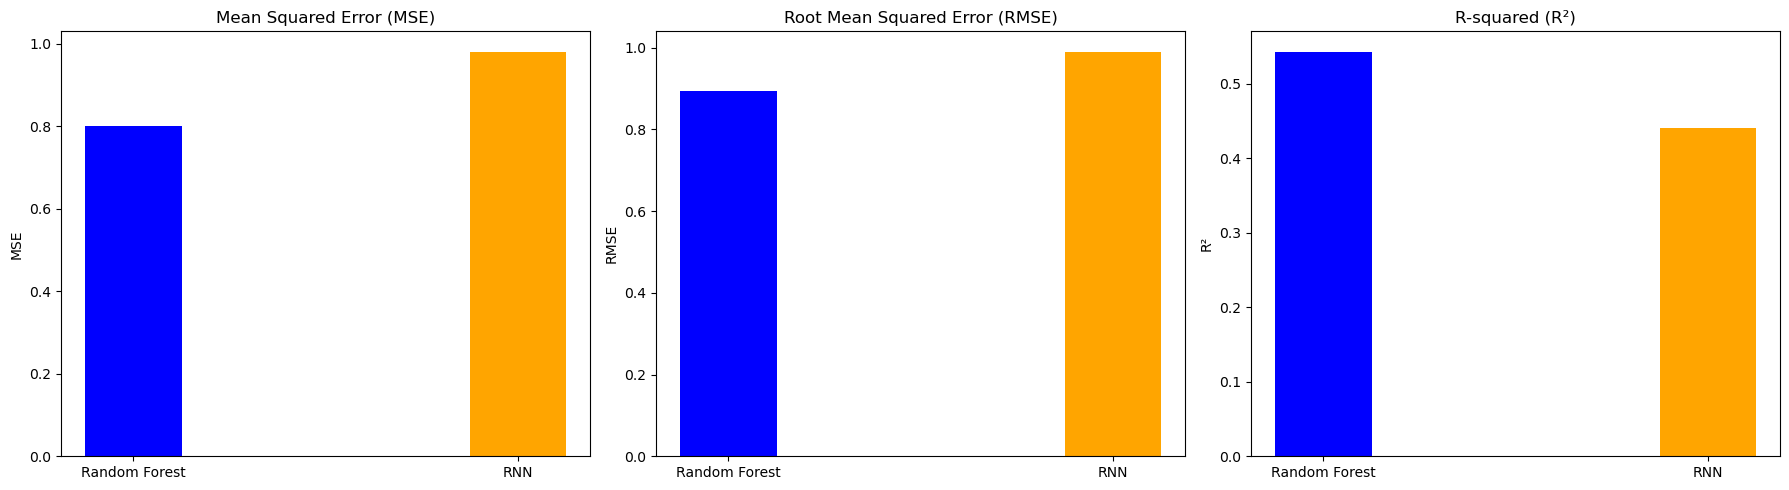

In [1548]:
# Models Comparison

# Store metrics in lists
models = ['Random Forest', 'RNN']
mse = [mse_rf, mse_rnn]
rmse = [rmse_rf, rmse_rnn]
r2 = [r2_rf, r2_rnn]

# Set positions for bars
x = np.arange(len(models))
width = 0.25

# Plot metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot MSE
ax[0].bar(x, mse, width, color=['blue', 'orange'])
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylabel('MSE')

# Plot RMSE
ax[1].bar(x, rmse, width, color=['blue', 'orange'])
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_ylabel('RMSE')

# Plot R²
ax[2].bar(x, r2, width, color=['blue', 'orange'])
ax[2].set_title('R-squared (R²)')
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)
ax[2].set_ylabel('R²')

# Adjust layout
plt.tight_layout()
plt.show()

MSE & RMSE:
The Random Forest model outperformed the RNN with a lower MSE (0.80 vs. 0.98) and RMSE (0.89 vs. 0.99). Lower values indicate better model performance since they measure the average squared error and its square root, respectively.

R-squared (R²):
Random Forest also achieved a higher R² (0.54) compared to the RNN (0.44). R² measures the proportion of the variance explained by the model, where higher values indicate better performance.